In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [11]:
data = pd.read_csv("C:/Practice datasets/Iris.csv",names = headernames)

In [12]:
data.shape

(151, 5)

In [13]:
data.head

<bound method NDFrame.head of       sepal-length   sepal-width   petal-length   petal-width           Class
Id   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  Iris-virginica

[151 rows x 5 columns]>

In [15]:
# Data Preprocessing
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, 4].values    # Target variable


In [16]:
#Now we will divide the dataset into training(70%) and test(30%) dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30)

In [23]:
#Inspect and clean data before scaling
print(data.dtypes)  # Displays the data types of each column
print(data.head())  # Shows the first few rows of the data


sepal-length    object
sepal-width     object
petal-length    object
petal-width     object
Class           object
dtype: object
     sepal-length   sepal-width   petal-length   petal-width        Class
Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa


In [28]:
# Remove or replace problematic columns or values
data = data.replace('SepalLengthCm', np.nan)  # Replace strings with NaN
data = data.dropna()  # Drop rows with NaN, if necessary


In [29]:
data.count()

sepal-length    150
sepal-width     150
petal-length    150
petal-width     150
Class           150
dtype: int64

In [39]:
print(X_train[:5])  # Inspect first 5 rows of training data
print(X_test[:5])   # Inspect first 5 rows of test data


[[-0.88198997  0.6517091  -1.17017987 -0.90901909]
 [ 1.13948773  0.6517091   1.16351218  1.22685793]
 [-1.00833233  1.15302379 -1.22852218 -0.77552678]
 [-0.75564762  0.90236644 -1.34520678 -1.30949603]
 [-1.13467469  0.15039441 -1.28686448 -1.44298834]]
[['5.6' '3.0' '4.1' '1.3']
 ['5.6' '2.8' '4.9' '2.0']
 ['4.9' '3.1' '1.5' '0.1']
 ['5.6' '2.9' '3.6' '1.3']
 ['6.7' '3.0' '5.2' '2.3']]


In [40]:
X = data.iloc[:, :-1].values  # Select all features (excluding labels)
y = data.iloc[:, -1].values  # Select the target column


In [42]:
import pandas as pd
import numpy as np

# Assuming you have the column headers available
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
X_df = pd.DataFrame(X, columns=column_names)  # Convert to a DataFrame for easier handling

# Convert non-numeric values to NaN and drop rows with NaN values
X_df = X_df.apply(pd.to_numeric, errors='coerce')
X_df = X_df.dropna()

# Convert back to NumPy array for further processing
X_clean = X_df.values



In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.30)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
#Test the accuracy of the Naive Bayes classifier over the training dataset
y_pred = classifier.predict(X_train)

In [47]:
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9523809523809523


In [ ]:
#For the Naive Bayes classifier, we are achieving an accuracy of 95.24% (approximately) for the training dataset.
#Therefore, the accuracy is really good on the training dataset.


In [48]:
y_pred = classifier.predict(X_test)

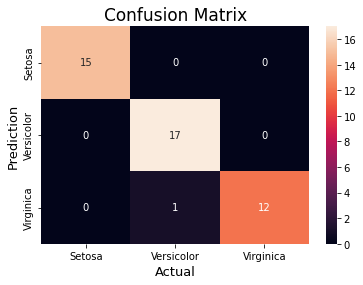

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#Out of 15 setosa 15 has been correctly classified,
#out of 17 Versicolor 17 has been correctly classified and
#out of 13 Virginica 12 has been correctly classified and 1 has been wrongly classified.


In [51]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [ ]:
#We have achieved an accuracy score of 97% for test data and accuracy scores are almost similar to train data hence there is no overfitting or underfitting.

In [52]:
# Now we will use Decision Tree Classifier
#random_state = 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = classifier.predict(X_train)

In [55]:
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:",accuracy)

Accuracy is: 1.0


In [56]:
#Now we will make prediction on test data
y_pred = classifier.predict(X_test)

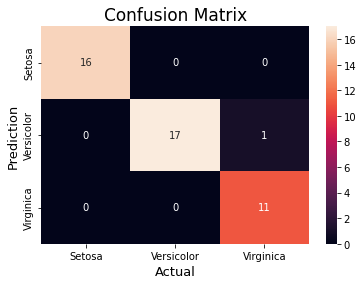

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [61]:
result1 = classification_report(y_test,y_pred)
print("Classification Report:",)
print(result1)
result2=accuracy_score(y_test,y_pred)
print("Accuracy:",result2)


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [62]:
#Random Forest classifier(20 decision trees)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=20)

In [64]:
y_pred = classifier.predict(X_train)

In [65]:
accuracy = accuracy_score(y_train,y_pred)
print("Accuracy is:",accuracy)

Accuracy is: 1.0


In [66]:
y_pred = classifier.predict(X_test)

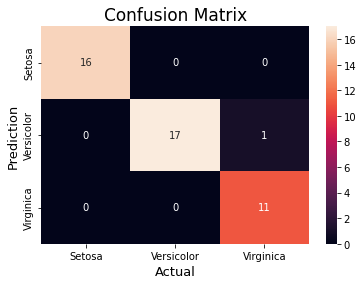

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [68]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777
